In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

[Kaggle Dataset] (https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat)


In [2]:
cats_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/cat",'gray')
dogs_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/dog",'gray')

In [3]:
cats_test_images = copy.deepcopy(cats_train_images)
dogs_test_images = copy.deepcopy(dogs_train_images)

In [4]:
train_packed = ImagePacker(data = [cats_train_images, dogs_train_images])
test_packed = ImagePacker(data = [cats_test_images, dogs_test_images])
# 

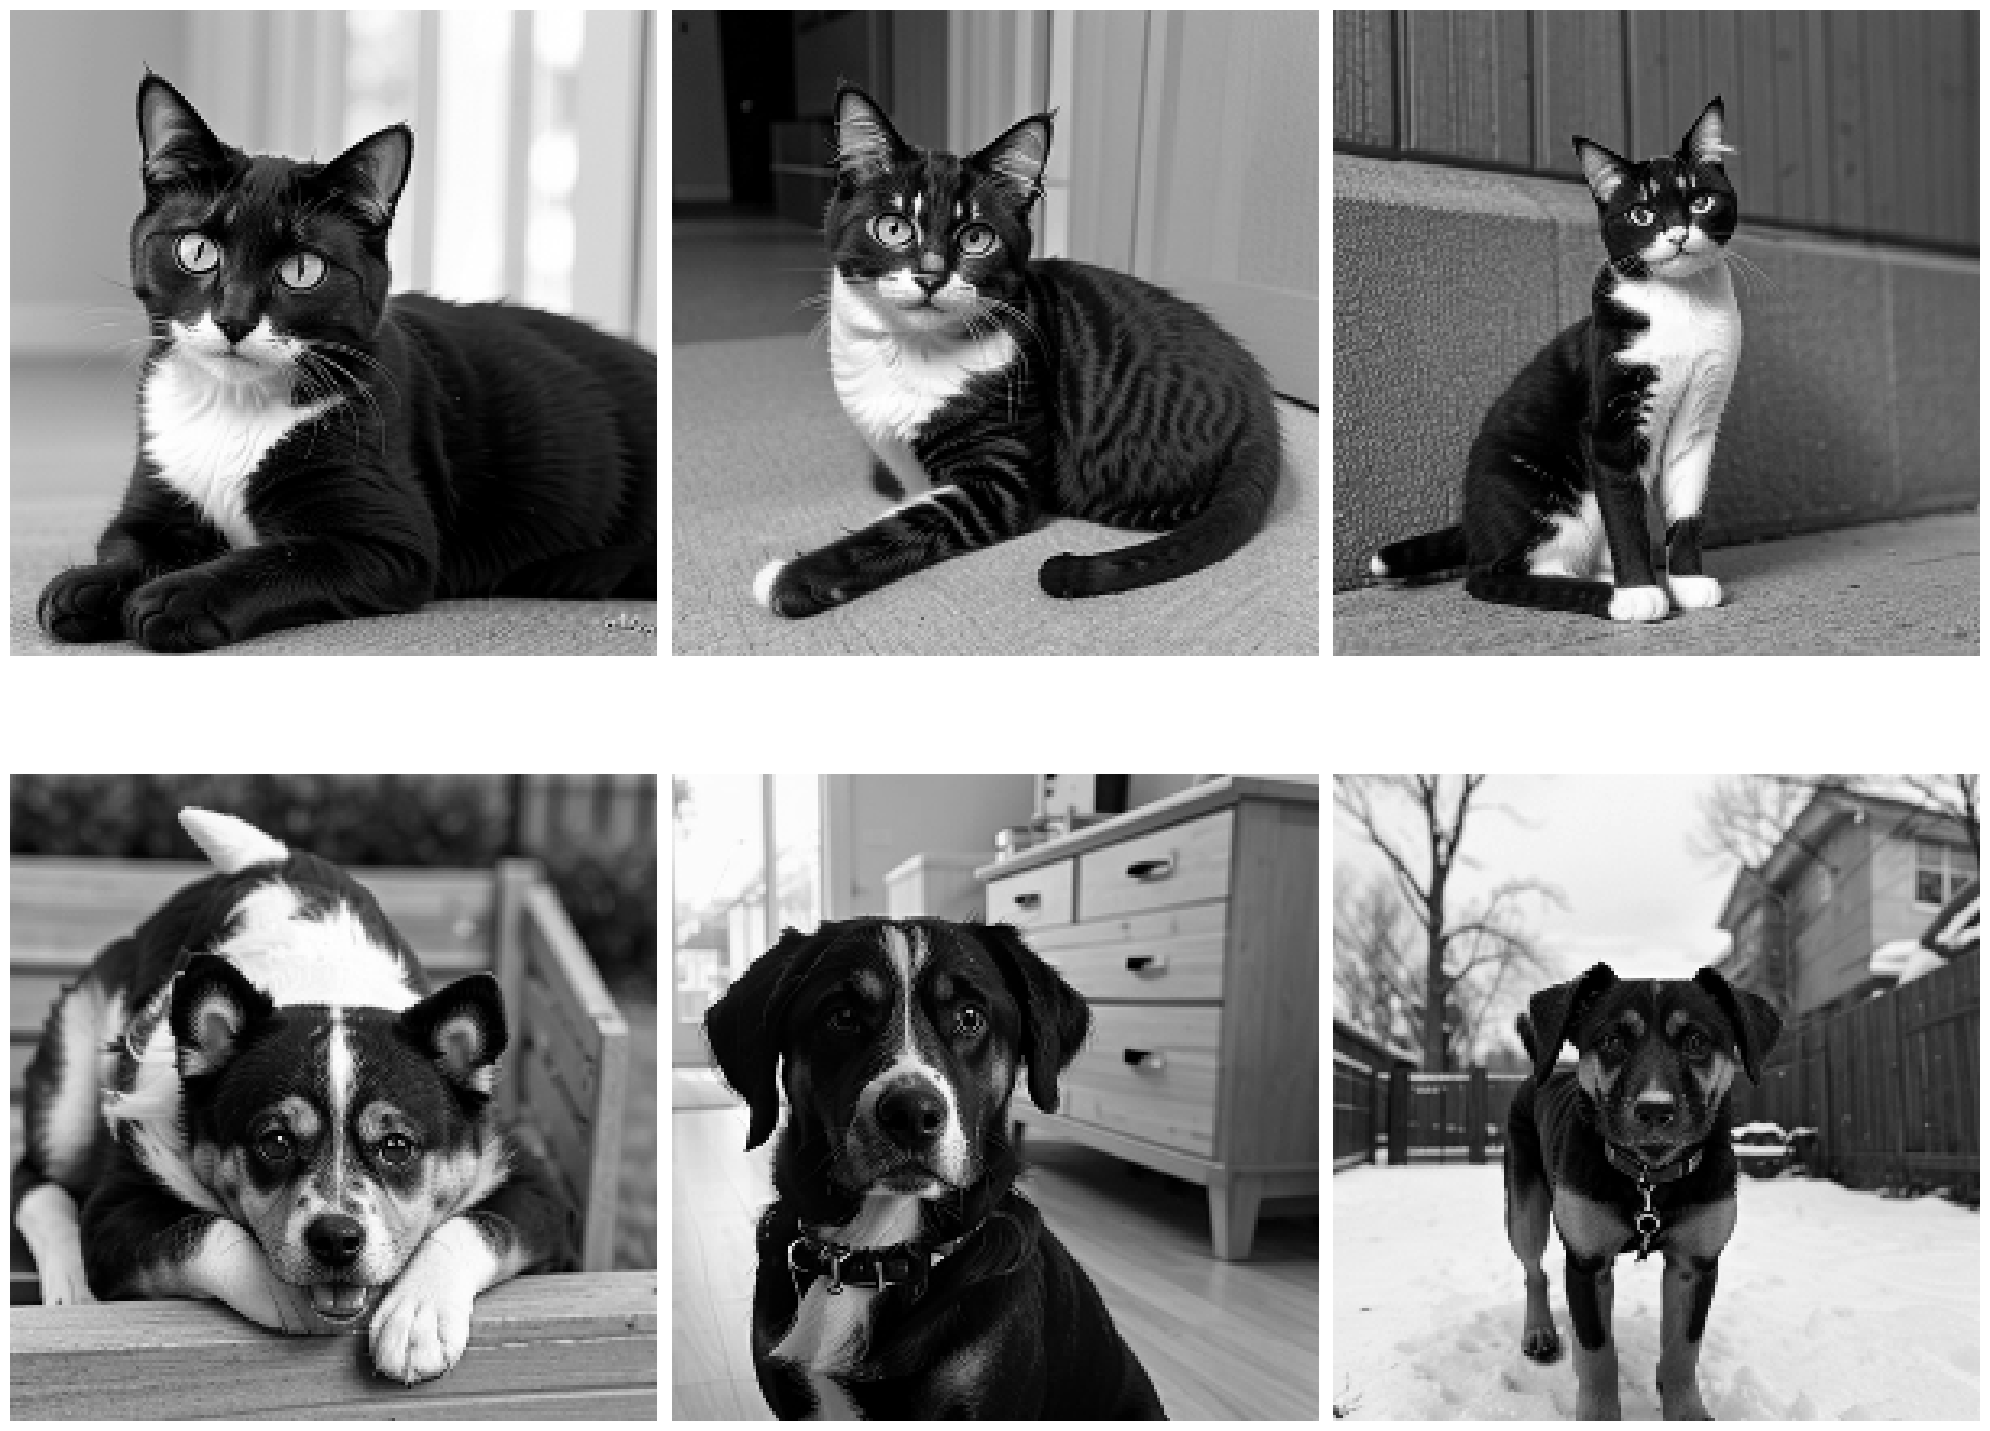

ImagePacker

In [5]:
train_packed

In [6]:
test_packed.rotate_images()

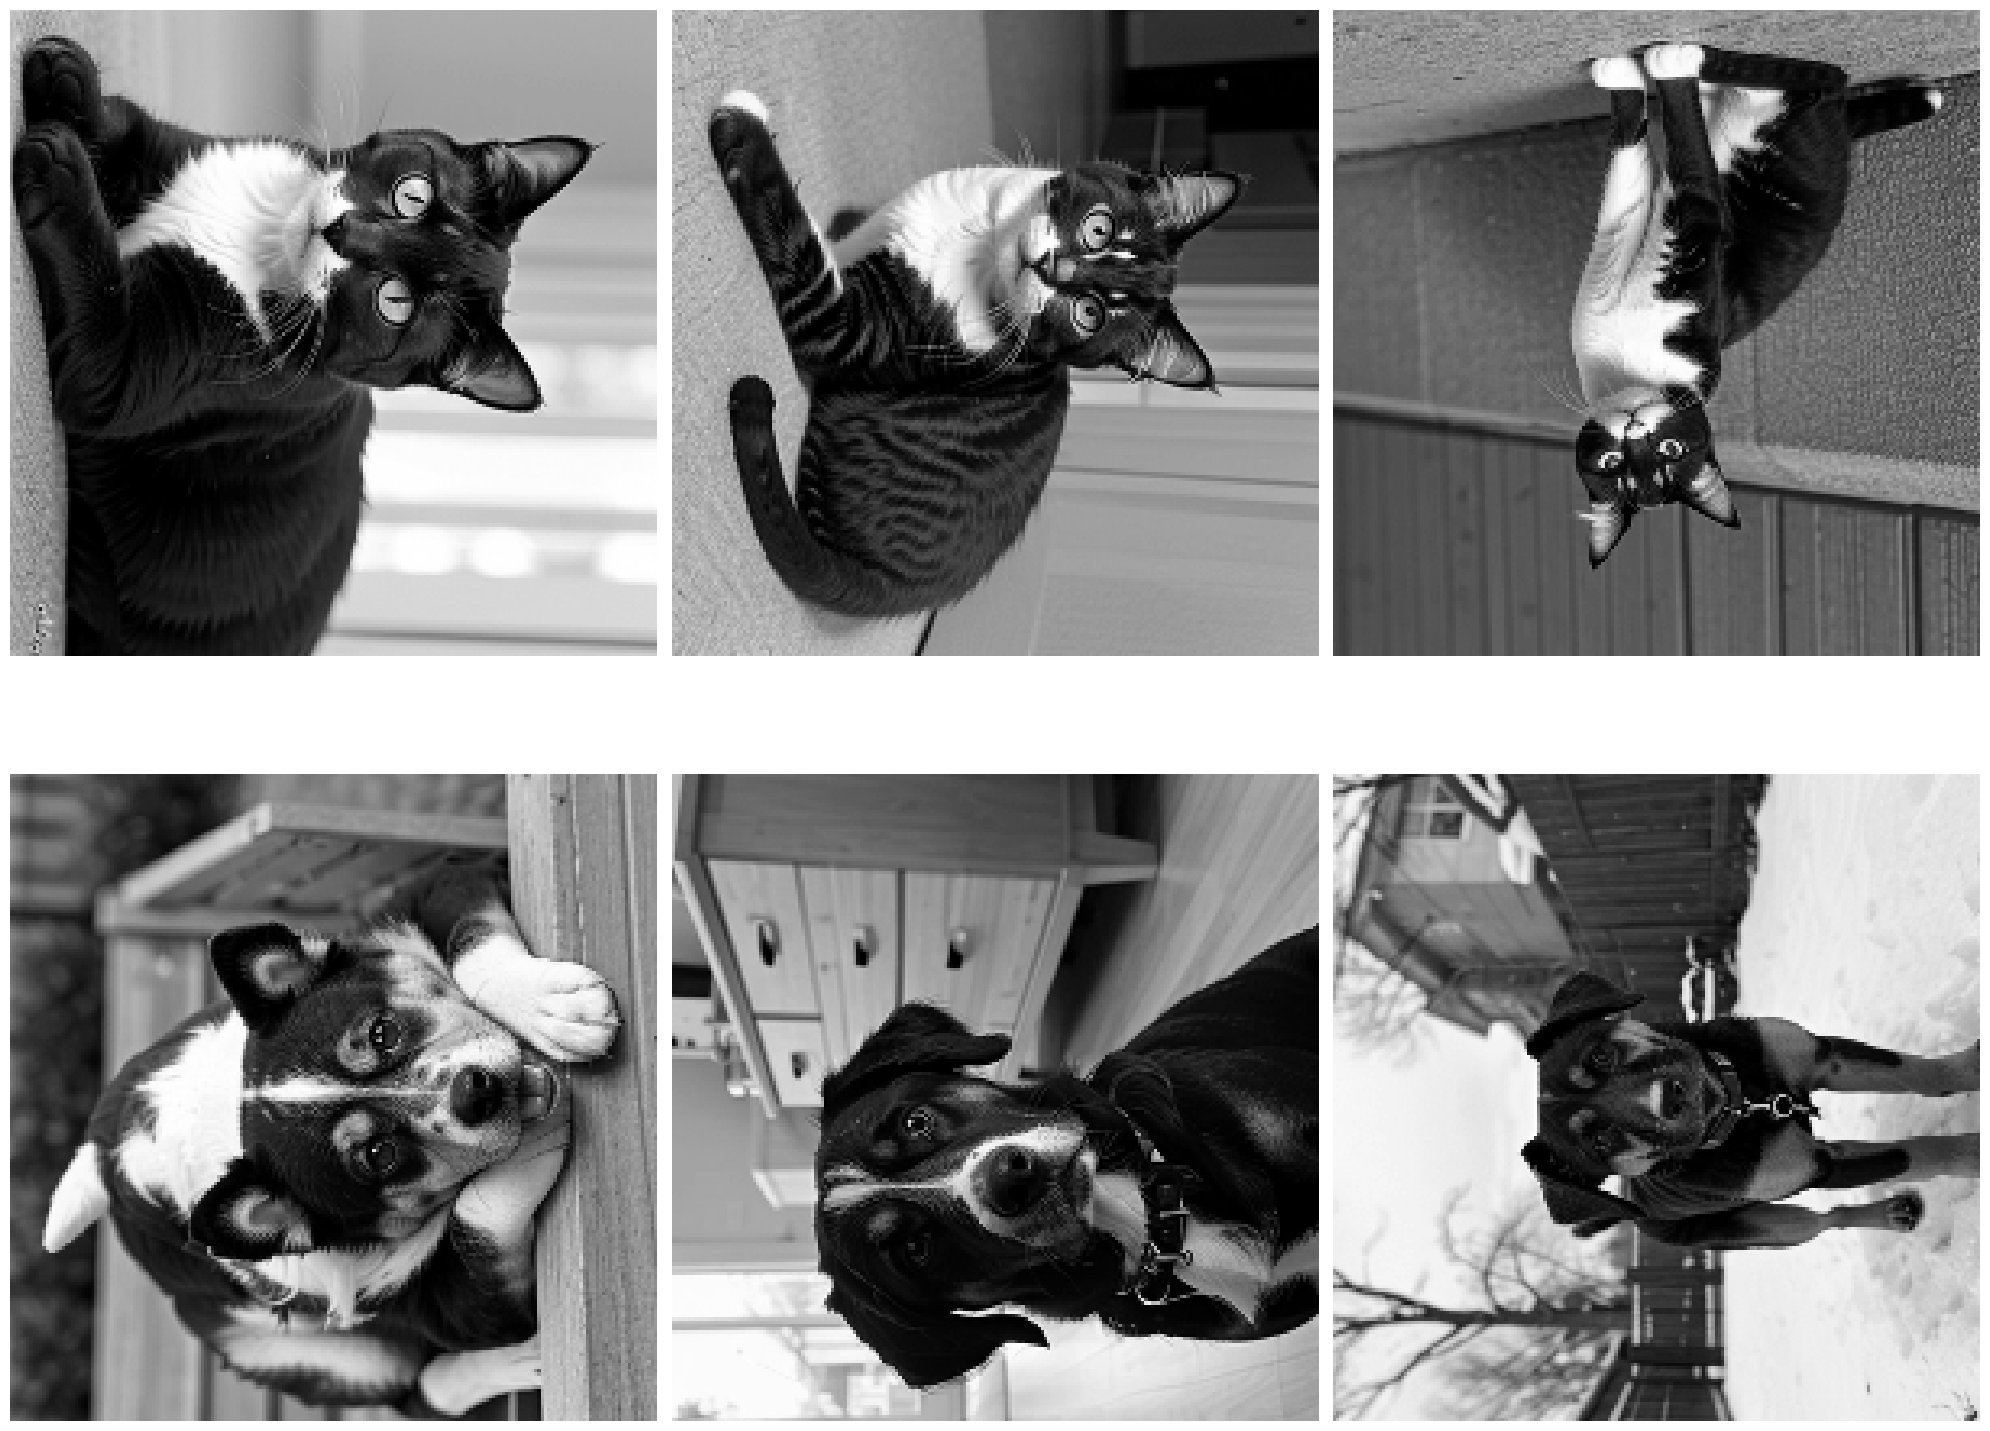

ImagePacker

In [7]:
test_packed

In [8]:
train_sift = train_packed.to_sift(append_label=[1,-1], block_size=8)
test_sift = test_packed.to_sift(append_label=[1,-1], block_size=8)

In [9]:
train_df = train_packed.descriptor_to_df(train_sift)
test_df = test_packed.descriptor_to_df(test_sift)

In [10]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
129,0.078578,0.000000,0.237517,0.336337,0.903643,0.087852,0.000000,0.000000,0.000000,0.038511,...,0.000000,0.010982,0.065161,0.986515,0.144989,0.009333,0.000000,0.000000,0.030272,-1
11,0.036175,0.040445,0.123123,0.755874,0.607649,0.203257,0.000000,0.000000,0.000000,0.000000,...,0.330535,0.654811,0.496072,0.274669,0.107977,0.068458,0.065825,0.040892,0.220861,1
20,0.666666,0.000000,0.471404,0.000000,0.333333,0.000000,0.471404,0.000000,0.000000,0.137686,...,0.368205,0.279448,0.073641,0.428132,0.135787,0.000000,0.073641,0.000000,0.651441,1
93,0.666123,0.419403,0.132627,0.000000,0.468907,0.000000,0.132627,0.209701,0.285225,0.552052,...,0.108148,0.239395,0.162221,0.556198,0.108148,0.136797,0.270369,0.000000,0.517277,1
168,0.308607,0.115011,0.145479,0.000000,0.925820,0.000000,0.000000,0.115011,0.000000,0.149381,...,0.109813,0.138903,0.054906,0.589317,0.320868,0.138903,0.219625,0.303727,0.494922,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.000000,0.000000,0.000000,0.000000,0.000000,0.454867,0.785251,0.420091,0.000000,0.213896,...,0.007428,0.008032,0.006678,0.999797,0.005934,0.003213,0.003318,0.002342,0.006931,1
7,0.830432,0.460681,0.000000,0.000000,0.000000,0.000000,0.000000,0.230341,0.212364,0.664364,...,0.071429,0.271052,0.071429,0.766652,0.142857,0.090351,0.071429,0.000000,0.681800,1
46,0.849734,0.116521,0.314221,0.000000,0.156329,0.000000,0.294777,0.233042,0.000000,0.656198,...,0.120269,0.100309,0.279135,0.754313,0.530186,0.084225,0.194070,0.047083,0.102228,1
199,0.725476,0.324443,0.205196,0.000000,0.507833,0.000000,0.205196,0.162221,0.000000,0.298142,...,0.011904,0.049309,0.324567,0.934937,0.113096,0.056838,0.011904,0.000000,0.015371,-1


In [11]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
3,0.000000,0.000000,0.000000,0.000000,0.655269,0.000000,0.635652,0.408129,0.000000,0.000000,...,0.070255,0.011290,0.000000,0.305142,0.220859,0.178536,0.265497,0.736455,0.241335,1
150,0.665748,0.699151,0.240962,0.000000,0.000000,0.000000,0.000000,0.099523,0.000000,0.253641,...,0.000000,0.108581,0.306160,0.599523,0.452290,0.221216,0.206818,0.473551,0.186496,-1
111,0.000000,0.305873,0.637528,0.000000,0.000000,0.525427,0.000000,0.473209,0.000000,0.478647,...,0.027499,0.075014,0.112715,0.977438,0.159611,0.000000,0.000000,0.000000,0.016119,-1
29,0.730800,0.000000,0.000000,0.000000,0.000000,0.000000,0.346087,0.588349,0.000000,0.555047,...,0.181001,0.083453,0.000000,0.963425,0.000000,0.000000,0.058557,0.000000,0.186038,1
45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.375990,...,0.000000,0.165935,0.180445,0.830969,0.496678,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.000000,0.000000,0.000000,0.000000,0.467951,0.804304,0.366219,0.000000,0.000000,0.562162,...,0.115277,0.060546,0.047866,0.000000,0.000000,0.060546,0.000000,0.197412,0.989632,-1
43,0.000000,0.000000,0.000000,0.000000,0.777429,0.512816,0.364175,0.000000,0.000000,0.064477,...,0.000000,0.003521,0.008069,0.999729,0.020130,0.007065,0.002085,0.001980,0.001793,1
85,0.652663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.757648,0.000000,0.104646,...,0.247120,0.000000,0.192725,0.104895,0.135576,0.090227,0.443598,0.719127,0.283417,1
89,0.538713,0.559972,0.492361,0.250339,0.000000,0.000000,0.222597,0.203913,0.000000,0.477222,...,0.377735,0.603022,0.369760,0.015459,0.075042,0.150532,0.343917,0.015935,0.742378,1


In [12]:
train_X, train_y = train_df.iloc[:,:-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:,:-1], test_df.iloc[:,-1]

In [13]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [14]:
predictions = model.predict(test_X)


In [15]:
f"Accuracy: {round(accuracy_score(test_y, predictions)*100,3)} %"

'Accuracy: 54.0 %'

In [16]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

          -1       0.52      0.87      0.65       100
           1       0.62      0.21      0.31       100

    accuracy                           0.54       200
   macro avg       0.57      0.54      0.48       200
weighted avg       0.57      0.54      0.48       200



In [17]:
mat = confusion_matrix(test_y, predictions)

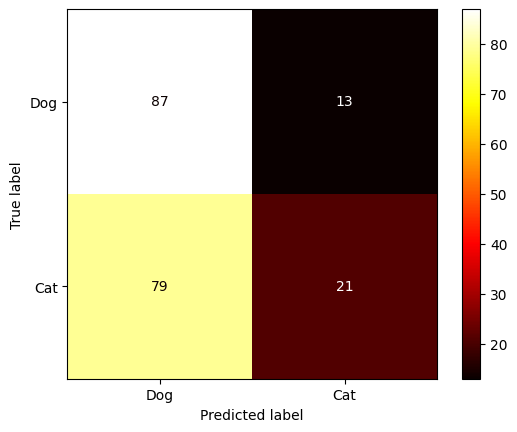

In [20]:
cmd = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=['Dog', 'Cat'])
cmd.plot(cmap="hot")